In [ ]:
import warnings
warnings.filterwarnings('ignore')
import shutil
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Set the path to the dataset
dataset_path = "/kaggle/input/brain-tumor-mri-dataset"

# Define the training and testing directories
train_dir = os.path.join(dataset_path, "/kaggle/input/brain-tumor-mri-dataset/Training")
test_dir = os.path.join(dataset_path, "/kaggle/input/brain-tumor-mri-dataset/Testing")

# Define the categories
categories = ["glioma", "meningioma", "notumor", "pituitary"]

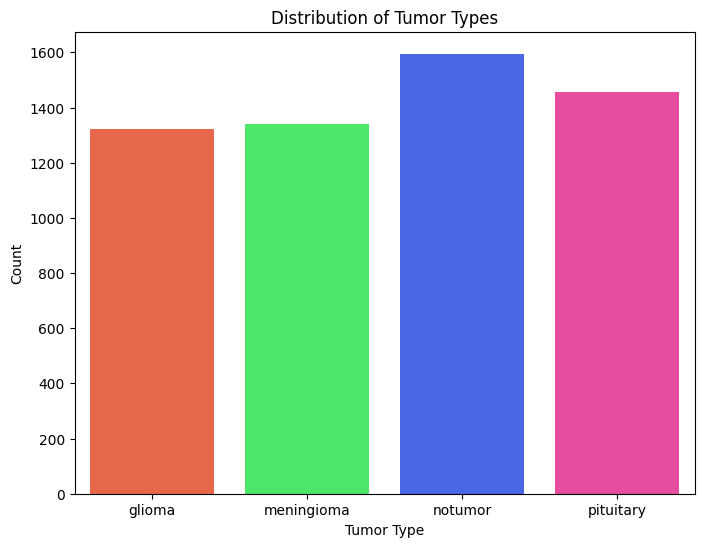

In [3]:
# Load and preprocess the dataset
train_data = []
for category in categories:
    folder_path = os.path.join(train_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))

train_df = pd.concat(train_data, ignore_index=True)

custom_colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1']
# Visualize the distribution of tumor types in the training dataset
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x="Category", y="Count", palette = custom_colors)
plt.title("Distribution of Tumor Types")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()

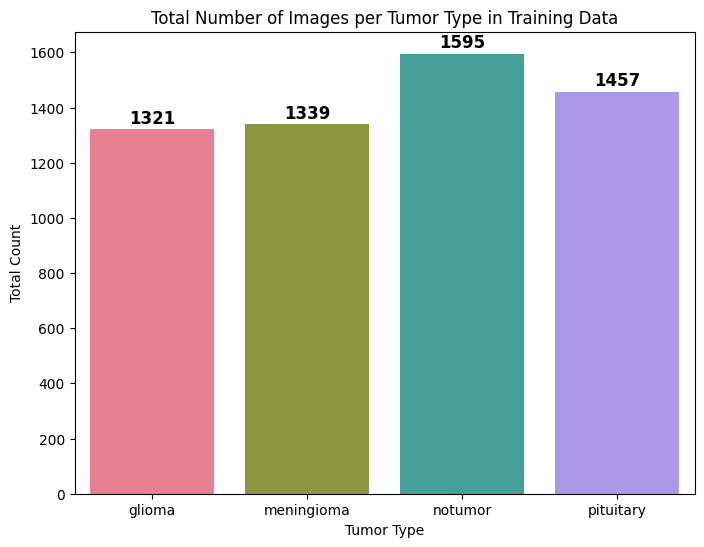

In [4]:
# Load and preprocess the dataset
train_data = []
for category in categories:
    folder_path = os.path.join(train_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))

train_df = pd.concat(train_data, ignore_index=True)

custom_colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1']
# Visualize the distribution of tumor types in the training dataset
plt.figure(figsize=(8, 6))
barplot = sns.barplot(data=train_df, x="Category", y="Count", palette="husl")

# Annotate each bar with the total count
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 8),
                     textcoords='offset points',
                     fontsize=12, color='black', weight='bold')

# Set titles and labels
plt.title("Total Number of Images per Tumor Type in Training Data")
plt.xlabel("Tumor Type")
plt.ylabel("Total Count")
plt.show()

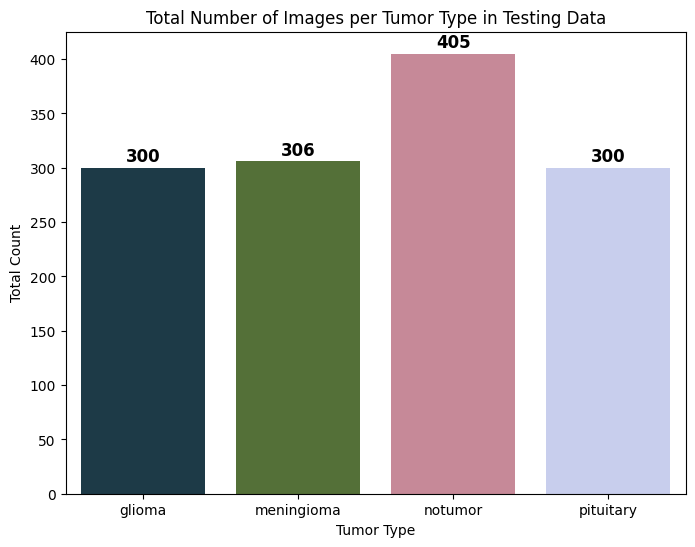

In [5]:
# Load and preprocess the dataset
test_data = []
for category in categories:
    folder_path = os.path.join(test_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    test_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))

test_df = pd.concat(test_data, ignore_index=True)

custom_colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1']
# Visualize the distribution of tumor types in the training dataset
plt.figure(figsize=(8, 6))
barplot = sns.barplot(data=test_df, x="Category", y="Count", palette="cubehelix")

# Annotate each bar with the total count
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 8),
                     textcoords='offset points',
                     fontsize=12, color='black', weight='bold')

# Set titles and labels
plt.title("Total Number of Images per Tumor Type in Testing Data")
plt.xlabel("Tumor Type")
plt.ylabel("Total Count")
plt.show()

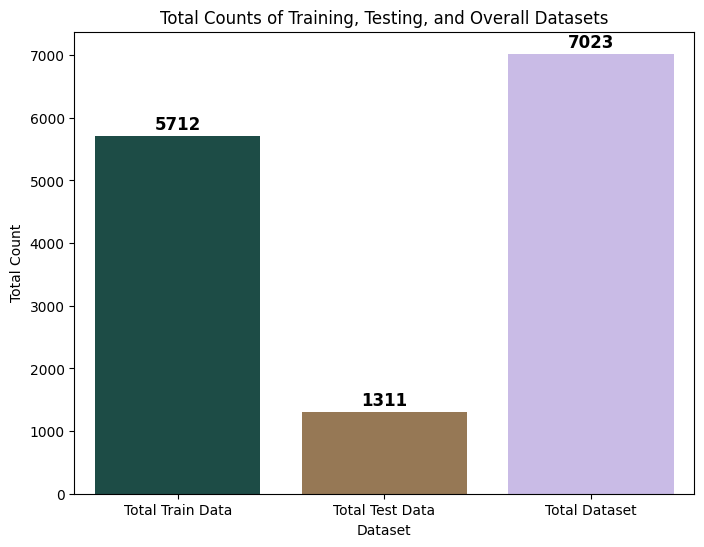

In [6]:
# Function to count total images in a directory
def count_total_images(directory):
    total_count = 0
    for category in os.listdir(directory):
        folder_path = os.path.join(directory, category)
        total_count += len(os.listdir(folder_path))
    return total_count

# Count total images in training and testing datasets
total_train_data = count_total_images(train_dir)
total_test_data = count_total_images(test_dir)
total_dataset = total_train_data + total_test_data

# Prepare data for visualization
summary_data = {
    "Dataset": ["Total Train Data", "Total Test Data", "Total Dataset"],
    "Count": [total_train_data, total_test_data, total_dataset]
}

summary_df = pd.DataFrame(summary_data)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(data=summary_df, x="Dataset", y="Count", palette="cubehelix")

# Add annotations to each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 8),
                       textcoords='offset points',
                       fontsize=12, color='black', weight='bold')

# Set titles and labels
plt.title("Total Counts of Training, Testing, and Overall Datasets")
plt.xlabel("Dataset")
plt.ylabel("Total Count")
plt.show()


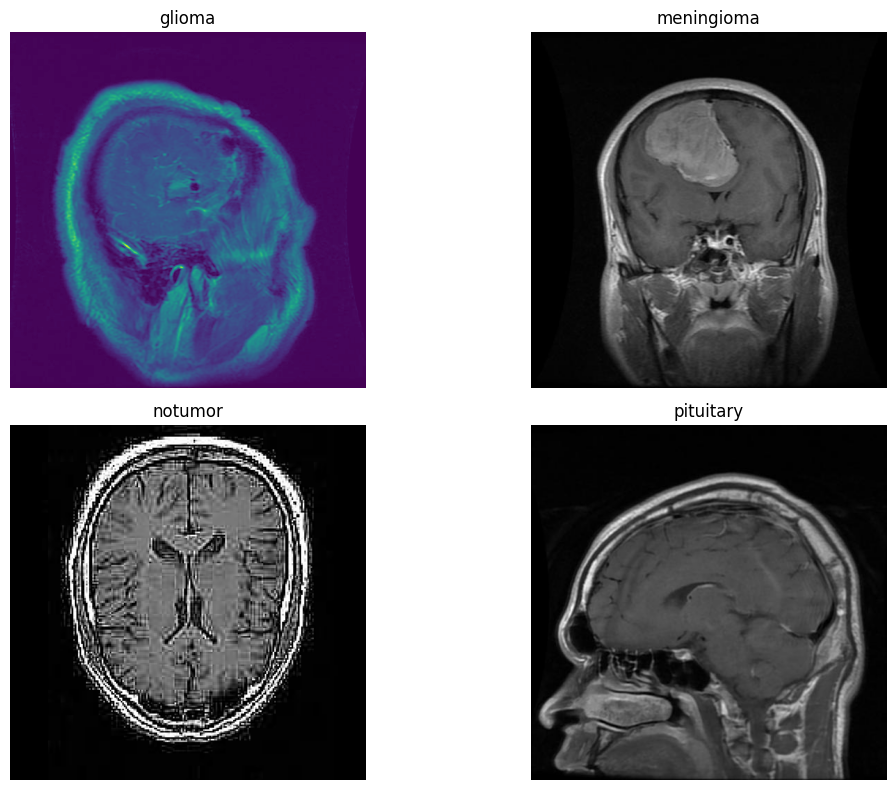

In [7]:
# Visualize sample images for each tumor type
plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    img = plt.imread(image_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [29]:
batch_size = 32

In [30]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  
    batch_size=batch_size,
    class_mode="categorical"  
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Match the input shape of the model
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [56]:
from tensorflow.keras.layers import GlobalAveragePooling2D
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GlobalAveragePooling2D())

model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [57]:
# Compile the Model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_13     │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,276 (430.77 KB)

 Trainable params: 110,276 (430.77 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
# Define callbacks function
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99:
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

back = myCallback()    

In [60]:
# Train the Model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator,
    callbacks=[back]
)

Epoch 1/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 43s 207ms/step - accuracy: 0.3351 - loss: 1.2799 - val_accuracy: 0.4241 - val_loss: 1.6669
Epoch 2/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 36s 193ms/step - accuracy: 0.6106 - loss: 0.9319 - val_accuracy: 0.4111 - val_loss: 1.7816
Epoch 3/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 186ms/step - accuracy: 0.6564 - loss: 0.8427 - val_accuracy: 0.4043 - val_loss: 1.9511
Epoch 4/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 187ms/step - accuracy: 0.6866 - loss: 0.7831 - val_accuracy: 0.4691 - val_loss: 1.5789
Epoch 5/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 188ms/step - accuracy: 0.7106 - loss: 0.7450 - val_accuracy: 0.5515 - val_loss: 1.1226
Epoch 6/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 189ms/step - accuracy: 0.7121 - loss: 0.7295 - val_accuracy: 0.4569 - val_loss: 1.6942
Epoch 7/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 36s 193ms/step - accuracy: 0.7299 - loss: 0.6815 - val_accuracy: 0.5431 - val_loss: 1.4037
Epoch 8/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 189ms/step - accuracy: 0.7477 -

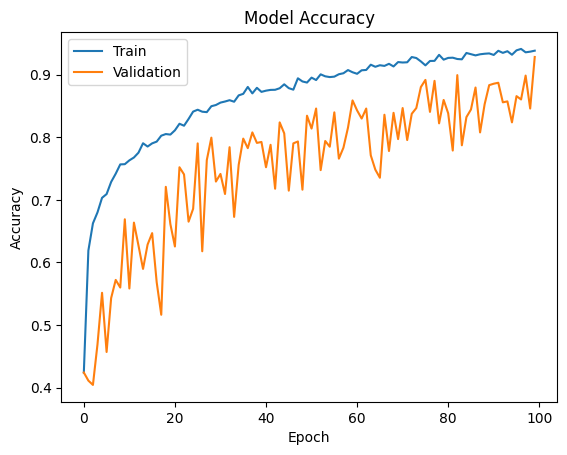

In [61]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

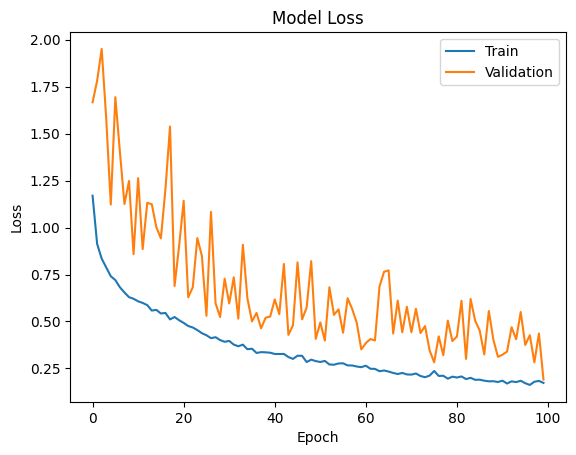

In [62]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [63]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.8988 - loss: 0.2723
Test Loss: 0.19463418424129486
Test Accuracy: 0.926562488079071


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step


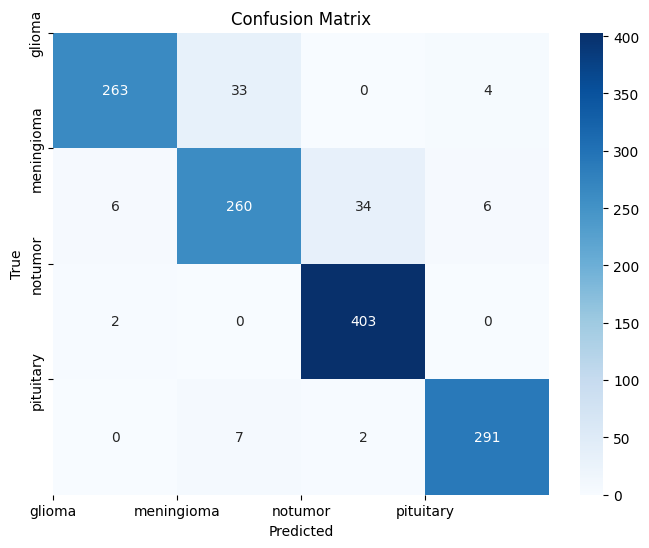

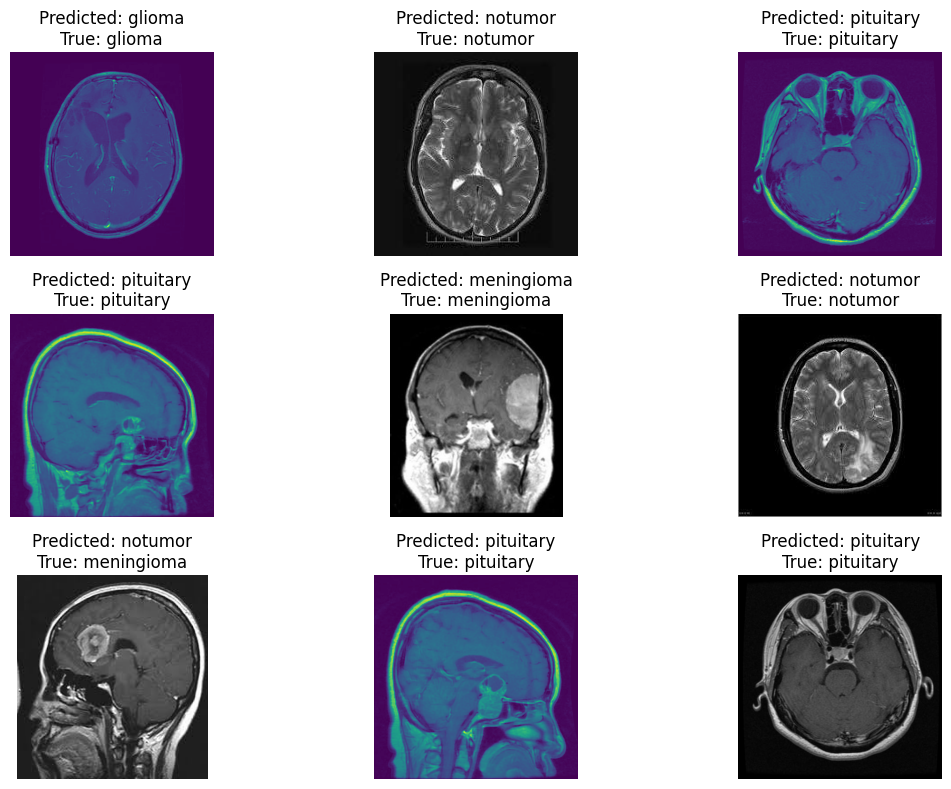

In [64]:
# Make predictions on the test dataset
predictions = model.predict(test_generator)
predicted_categories = np.argmax(predictions, axis=1)
true_categories = test_generator.classes

# Create a confusion matrix
confusion_matrix = tf.math.confusion_matrix(true_categories, predicted_categories)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.yticks(ticks=np.arange(len(categories)), labels=categories)
plt.show()

# Plot sample images with their predicted and true labels
test_images = test_generator.filenames
sample_indices = np.random.choice(range(len(test_images)), size=9, replace=False)
sample_images = [test_images[i] for i in sample_indices]
sample_predictions = [categories[predicted_categories[i]] for i in sample_indices]
sample_true_labels = [categories[true_categories[i]] for i in sample_indices]

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
# Save the trained model
#model.save("brain_tumor_detection_model.h5")
model.save("brain_tumor_detection_model.h5")